In [3]:
<a href="https://colab.research.google.com/drive/1Ah5qxDlHBZ40DCc7cd4HKCQIFAZVEJvY?usp=sharing " target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SyntaxError: invalid syntax (1905900105.py, line 1)

In [1]:
!pip install kaggle umap-learn

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
License(s): CC0-1.0
  0% 0.00/6.03M [00:00<?, ?B/s]
100% 6.03M/6.03M [00:00<00:00, 854MB/s]


In [5]:
!unzip diabetes-health-indicators-dataset.zip

Archive:  diabetes-health-indicators-dataset.zip
  inflating: diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_health_indicators_BRFSS2015.csv  


In [6]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')


In [7]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [8]:
print("Dataset shape:", df.shape)

print("\nData Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())


Dataset shape: (253680, 22)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth     

In [9]:
missing_counts = df.isnull().sum()
missing_percentage = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_counts, 'Percentage (%)': missing_percentage})
print("\nMissing Values:")
print(missing_df[missing_df['Missing Values'] > 0])  # Show only columns with missing data



Missing Values:
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


In [10]:
# Class distribution for 'Diabetes_012'
print("\nClass Distribution (Raw Counts):")
print(df['Diabetes_012'].value_counts())

print("\nClass Distribution (Proportions):")
print(df['Diabetes_012'].value_counts(normalize=True))



Class Distribution (Raw Counts):
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Class Distribution (Proportions):
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64


In [11]:
target_col = 'Diabetes_012'
feature_cols = [col for col in df.columns if col != target_col]

print("\nTarget Column:", target_col)
print("Feature Columns ({}):".format(len(feature_cols)), feature_cols)


Target Column: Diabetes_012
Feature Columns (21): ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [12]:
binary_features = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'
]

ordinal_features = ['GenHlth', 'Education', 'Income', 'Age']

continuous_features = ['BMI', 'MentHlth', 'PhysHlth']

target_col = 'Diabetes_012'


In [13]:
X = df.drop(columns='Diabetes_012')
y = df['Diabetes_012']

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original class distribution:\n", Counter(y))
print("After SMOTE:\n", Counter(y_resampled))

Original class distribution:
 Counter({0.0: 213703, 2.0: 35346, 1.0: 4631})
After SMOTE:
 Counter({0.0: 213703, 2.0: 213703, 1.0: 213703})


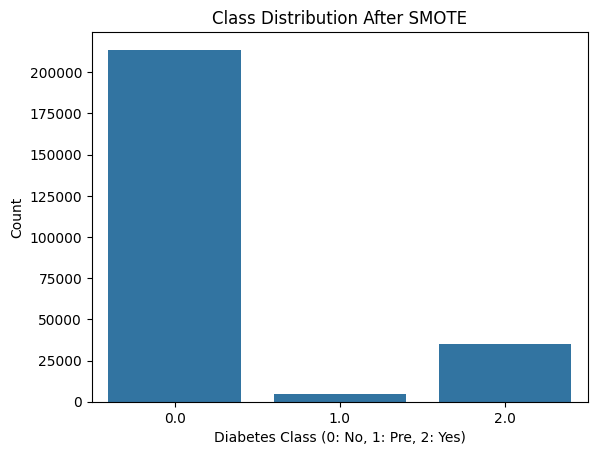

In [20]:
sns.countplot(x=y)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Diabetes Class (0: No, 1: Pre, 2: Yes)')
plt.ylabel('Count')
plt.show()


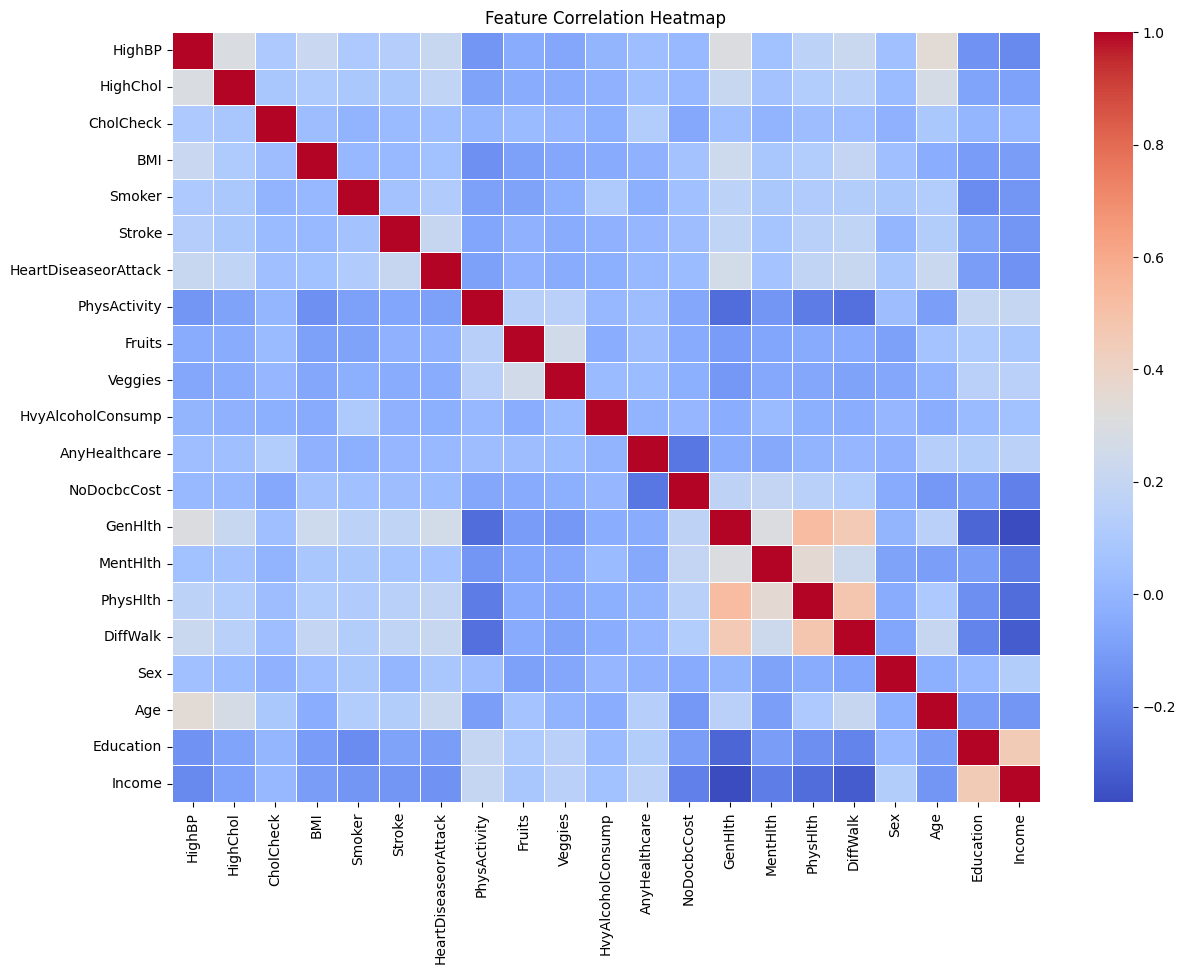

In [21]:
plt.figure(figsize=(14,10))
correlation = X.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


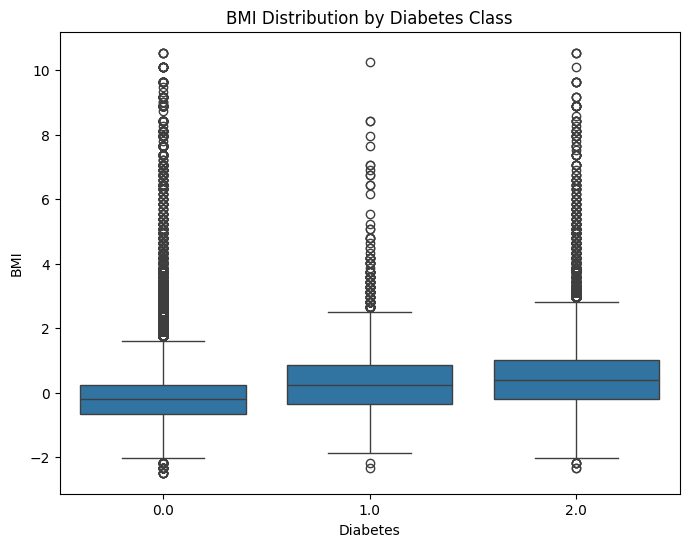

In [22]:
resampled_df = pd.DataFrame(X, columns=X.columns)
resampled_df['Diabetes'] = y.values

plt.figure(figsize=(8,6))
sns.boxplot(x='Diabetes', y='BMI', data=resampled_df)
plt.title("BMI Distribution by Diabetes Class")
plt.show()


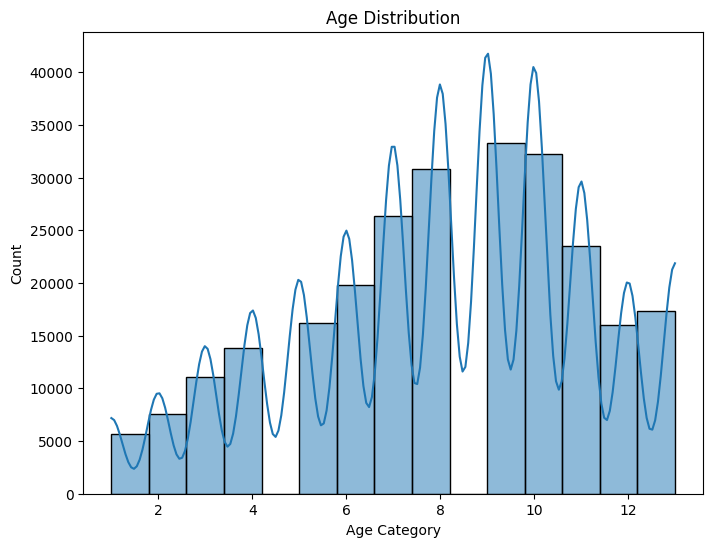

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(resampled_df['Age'], bins=15, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.show()


In [24]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

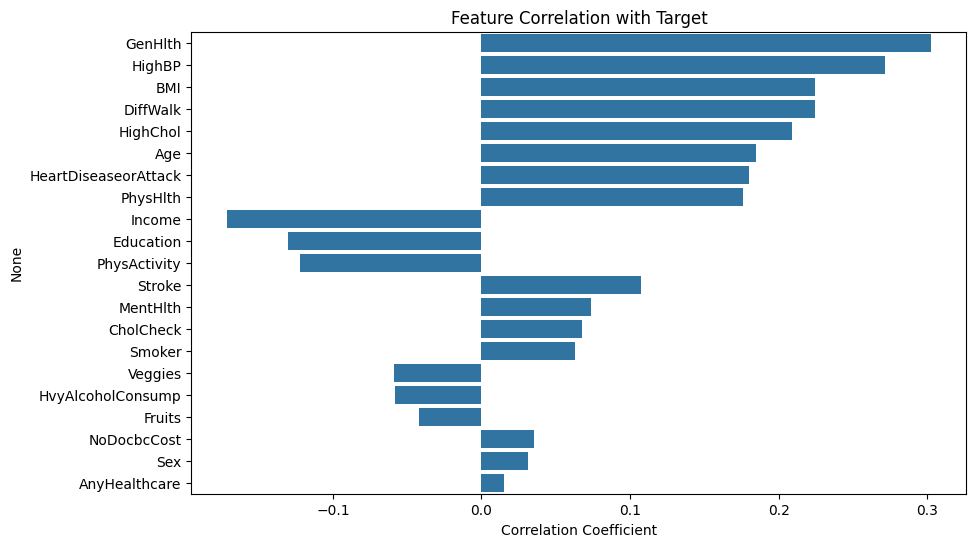

In [25]:
# Compute correlations
correlations = df.corr()['Diabetes_012'].drop('Diabetes_012')
correlations = correlations.sort_values(key=abs, ascending=False)

# Plot correlations with target
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Feature Correlation with Target')
plt.xlabel('Correlation Coefficient')
plt.show()

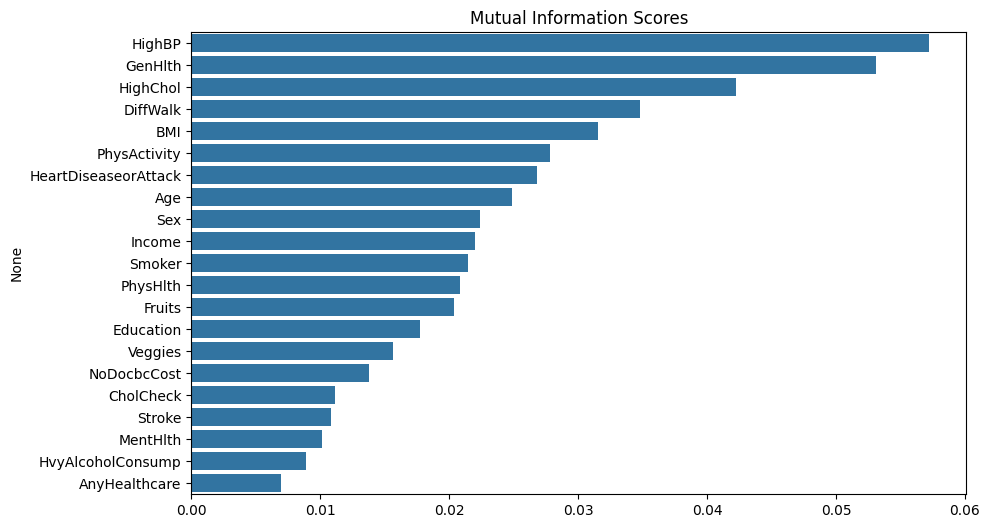

In [26]:
X = df.drop(columns='Diabetes_012')
y = df['Diabetes_012']

# Standardize for better MI estimation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute mutual information
from sklearn.feature_selection import SelectKBest
mi = mutual_info_classif(X_scaled, y)

# Show scores
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores.values, y=mi_scores.index)
plt.title("Mutual Information Scores")
plt.show()

In [27]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Adjust as needed
X_high_var = selector.fit_transform(X)
print("Features retained:", X.columns[selector.get_support()])


Features retained: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


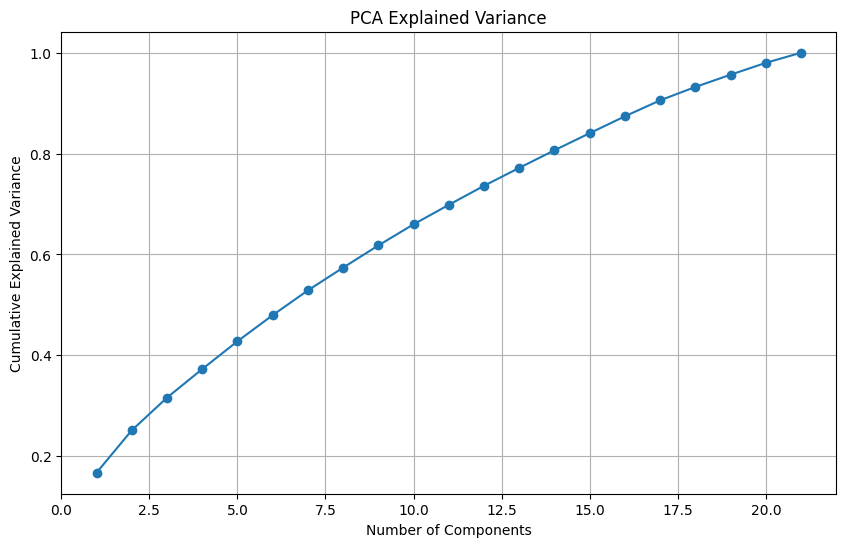

In [28]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()


At around 14 components, you capture roughly 90% of the variance so our K is 14

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

k = 15
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_scaled)

pca_columns = [f'PC{i+1}' for i in range(k)]
X_reduced = pd.DataFrame(X_pca, columns=pca_columns)

final_dataset = pd.concat([X_reduced, y.reset_index(drop=True)], axis=1)

In [37]:
# Optional: Save to CSV
# final_dataset.to_csv("pca_reduced_dataset.csv", index=False)

In [38]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    print(f"\n=== {name} ===")

    preds = cross_val_predict(model, X_resampled, y_resampled, cv=5)

    print(classification_report(y_resampled, preds))



=== Logistic Regression ===
              precision    recall  f1-score   support

         0.0       0.61      0.66      0.63    213703
         1.0       0.44      0.34      0.38    213703
         2.0       0.51      0.59      0.55    213703

    accuracy                           0.53    641109
   macro avg       0.52      0.53      0.52    641109
weighted avg       0.52      0.53      0.52    641109


=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90    213703
         1.0       0.99      0.97      0.98    213703
         2.0       0.92      0.87      0.90    213703

    accuracy                           0.93    641109
   macro avg       0.93      0.93      0.93    641109
weighted avg       0.93      0.93      0.93    641109

